# **Import all the libraries**

In [ ]:
pip install pandas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline


In [ ]:
movies=pd.read_csv("/content/movies.dat",sep="::",header=None)
ratings=pd.read_csv("/content/ratings.dat",sep="::",header=None)
users=pd.read_csv("/content/users.dat",sep="::",header=None)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel 

In [ ]:
movies.columns = ['MovieID','Title','Genres']
ratings.columns = ['UserID','MovieID','Rating','Timestamp']
users.columns = ['UserID','Gender','Age','Occupation','Zip-code']

In [ ]:
# del movies['Genres']
# del ratings['Timestamp']
# del users['Zip-code']

In [ ]:
master1 = pd.merge(movies,ratings,on='MovieID',how='inner')
master1

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474
...,...,...,...,...,...,...
1000204,3952,"Contender, The (2000)",Drama|Thriller,5812,4,992072099
1000205,3952,"Contender, The (2000)",Drama|Thriller,5831,3,986223125
1000206,3952,"Contender, The (2000)",Drama|Thriller,5837,4,1011902656
1000207,3952,"Contender, The (2000)",Drama|Thriller,5927,1,979852537


In [ ]:
Master_Table = pd.merge(master1,users)
Master_Table

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067
...,...,...,...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement (2000),Drama|Thriller,5727,4,958489970,M,25,4,92843
1000205,3535,American Psycho (2000),Comedy|Horror|Thriller,5727,2,958489970,M,25,4,92843
1000206,3536,Keeping the Faith (2000),Comedy|Romance,5727,5,958489902,M,25,4,92843
1000207,3555,U-571 (2000),Action|Thriller,5727,3,958490699,M,25,4,92843


In [ ]:
del Master_Table['Genres']
del Master_Table['Timestamp']
del Master_Table['Zip-code']

Text(0, 0.5, 'User Count')

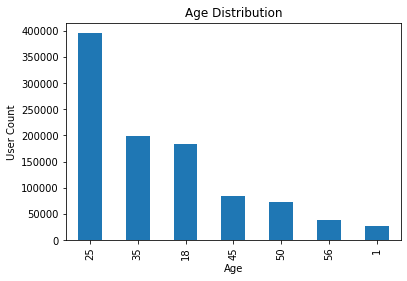

In [ ]:
Master_Table['Age'].value_counts().plot.bar()
plt.title('Age Distribution')
plt.xlabel("Age")
plt.ylabel('User Count')

From the above graph we can conclude that the maximum movie users belong to age group **25-34**

In [ ]:
toy_story = Master_Table[Master_Table['Title'].str.contains('Toy Story')==True] 

In [ ]:
toy_story

,MovieID,Title,UserID,Rating,Gender,Age,Occupation
0,1,Toy Story (1995),1,5,F,1,10
50,3114,Toy Story 2 (1999),1,4,F,1,10
53,1,Toy Story (1995),6,4,F,50,9
124,1,Toy Story (1995),8,4,M,25,12
263,1,Toy Story (1995),9,5,M,25,17
...,...,...,...,...,...,...,...
998988,3114,Toy Story 2 (1999),3023,4,F,25,7
999027,3114,Toy Story 2 (1999),5800,5,M,35,18
999486,3114,Toy Story 2 (1999),2189,4,M,1,10
999869,3114,Toy Story 2 (1999),159,4,F,45,0


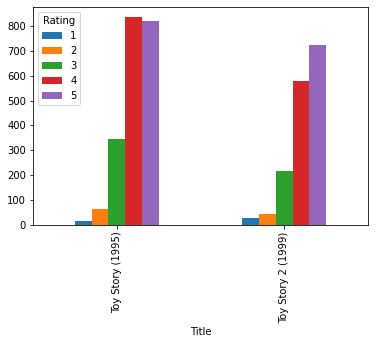

In [ ]:
toy_story.groupby(['Title','Rating']).size().unstack().plot.bar(legend=True)

From above graph we can conclude that:

1.   Toy Story : The highest rating is 4 followed by 5
2.   Toy story 2: The highest rating is 5 followed by 4



In [ ]:
top_movies = Master_Table['Title'].value_counts()

In [ ]:
top_25=top_movies[:25]

Text(0.5, 1.0, 'Top 25 movies by viewership rating')

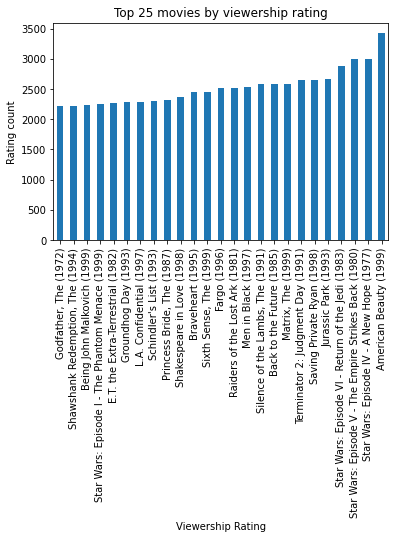

In [ ]:
top_25.sort_values(inplace=True)
top_25.plot.bar()
plt.xlabel('Viewership Rating')
plt.ylabel('Rating count')
plt.title('Top 25 movies by viewership rating')

In [ ]:
Master_Table

,MovieID,Title,UserID,Rating,Gender,Age,Occupation
0,1,Toy Story (1995),1,5,F,1,10
1,48,Pocahontas (1995),1,5,F,1,10
2,150,Apollo 13 (1995),1,5,F,1,10
3,260,Star Wars: Episode IV - A New Hope (1977),1,4,F,1,10
4,527,Schindler's List (1993),1,5,F,1,10
...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement (2000),5727,4,M,25,4
1000205,3535,American Psycho (2000),5727,2,M,25,4
1000206,3536,Keeping the Faith (2000),5727,5,M,25,4
1000207,3555,U-571 (2000),5727,3,M,25,4


The top movie according to viewership rating is **American Beauty (1999)**

In [ ]:
user_id = 2696
user_rating = Master_Table[Master_Table['UserID']==user_id]
user_rating

,MovieID,Title,UserID,Rating,Gender,Age,Occupation
991035,350,"Client, The (1994)",2696,3,M,25,7
991036,800,Lone Star (1996),2696,5,M,25,7
991037,1092,Basic Instinct (1992),2696,4,M,25,7
991038,1097,E.T. the Extra-Terrestrial (1982),2696,3,M,25,7
991039,1258,"Shining, The (1980)",2696,4,M,25,7
991040,1270,Back to the Future (1985),2696,2,M,25,7
991041,1589,Cop Land (1997),2696,3,M,25,7
991042,1617,L.A. Confidential (1997),2696,4,M,25,7
991043,1625,"Game, The (1997)",2696,4,M,25,7
991044,1644,I Know What You Did Last Summer (1997),2696,2,M,25,7


Text(0.5, 1.0, 'Ratings for all the movies reviewed by for a particular user 2696')

<Figure size 1440x1440 with 0 Axes>

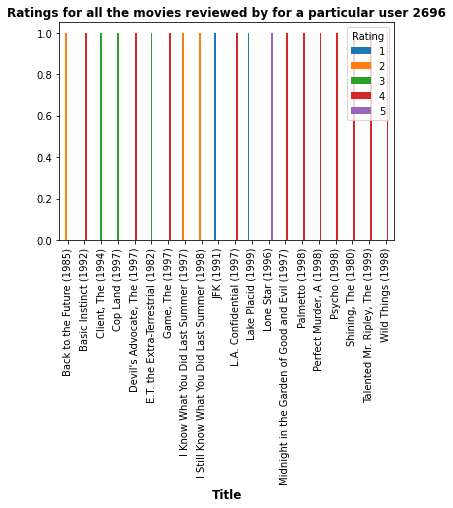

In [ ]:
plt.figure(figsize=(20,20))
user_rating.groupby(['Title','Rating']).size().unstack().plot.bar(legend=True)
plt.xlabel('Title',fontsize='large', fontweight='bold')
plt.title('Ratings for all the movies reviewed by for a particular user 2696',fontsize='large', fontweight='bold')

# **FEATURE ENGINEERING**


In [ ]:
genres = movies['Genres']
unique_genres = []
for value in genres:
  if '|' in value:
    val = value.split('|')
    for v in val:
      unique_genres.append(v)
  else:
    unique_genres.append(value)
unique_genre = list(frozenset(unique_genres))

## ***Unique Genres***

In [ ]:
unique_genre

['Musical',
 'Animation',
 'Sci-Fi',
 'Adventure',
 'Crime',
 'Thriller',
 'Mystery',
 'Film-Noir',
 'Romance',
 "Children's",
 'Documentary',
 'Horror',
 'Action',
 'Western',
 'Comedy',
 'Fantasy',
 'War',
 'Drama']

In [ ]:
oneHot = pd.get_dummies(unique_genres)

In [ ]:
oneHot

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6403,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6404,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6405,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6406,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


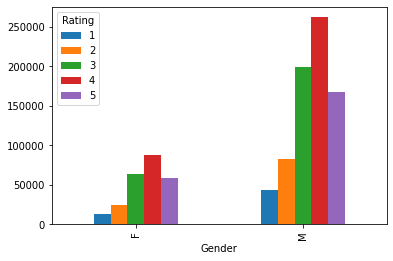

In [ ]:
Master_Table.groupby(['Gender','Rating']).size().unstack().plot.bar()

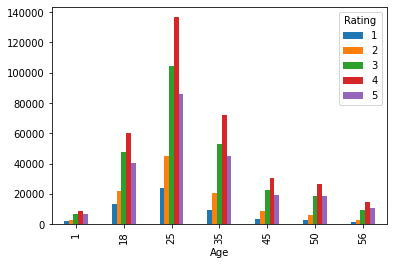

In [ ]:
Master_Table.groupby(['Age','Rating']).size().unstack().plot.bar()

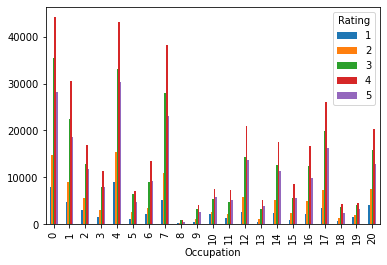

In [ ]:
Master_Table.groupby(['Occupation','Rating']).size().unstack().plot.bar()

In [ ]:
movies=pd.read_csv("/content/movies.dat",sep="::",header=None)
ratings=pd.read_csv("/content/ratings.dat",sep="::",header=None)
users=pd.read_csv("/content/users.dat",sep="::",header=None)
movies.columns = ['MovieID','Title','Genres']
ratings.columns = ['UserID','MovieID','Rating','Timestamp']
users.columns = ['UserID','Gender','Age','Occupation','Zip-code']
master1 = pd.merge(movies,ratings,on='MovieID',how='inner')
Master_Table = pd.merge(master1,users,on='UserID',how='inner')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel 

In [ ]:
Master_Table.shape

(1000209, 10)

In [ ]:
# sns.heatmap(Master_Table)
Master_Table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   MovieID     1000209 non-null  int64 
 1   Title       1000209 non-null  object
 2   Genres      1000209 non-null  object
 3   UserID      1000209 non-null  int64 
 4   Rating      1000209 non-null  int64 
 5   Timestamp   1000209 non-null  int64 
 6   Gender      1000209 non-null  object
 7   Age         1000209 non-null  int64 
 8   Occupation  1000209 non-null  int64 
 9   Zip-code    1000209 non-null  object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


In [ ]:
Master_Table['Zip-code'].value_counts()

94110    3802
60640    3430
98103    3204
95616    3079
02138    3019
         ... 
13317      20
10803      20
60050      20
53222      20
76707      20
Name: Zip-code, Length: 3439, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
number = LabelEncoder()
Master_Table['Zip-code'] = number.fit_transform(Master_Table['Zip-code'].astype('str'))

In [ ]:
Master_Table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   MovieID     1000209 non-null  int64 
 1   Title       1000209 non-null  object
 2   Genres      1000209 non-null  object
 3   UserID      1000209 non-null  int64 
 4   Rating      1000209 non-null  int64 
 5   Timestamp   1000209 non-null  int64 
 6   Gender      1000209 non-null  object
 7   Age         1000209 non-null  int64 
 8   Occupation  1000209 non-null  int64 
 9   Zip-code    1000209 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 83.9+ MB


In [ ]:
Master_Table['Title'] = number.fit_transform(Master_Table['Title'].astype('str'))
Master_Table['Gender'] = number.fit_transform(Master_Table['Gender'].astype('str'))
# Master_Table['Genres'] = number.fit_transform(Master_Table['Genres'].astype('str'))
# Master_Table['Genres'] = pd.get_dummies(unique_genres)
# Master_Table.append(oneHot)
oneHot =pd.get_dummies(unique_genres)
Master_Table = Master_Table.join(oneHot)

In [ ]:
Master_Table

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,3411,0.0,1,5,978824268,0,1,10,1588
1,48,2598,0.0,1,5,978824351,0,1,10,1588
2,150,195,0.0,1,5,978301777,0,1,10,1588
3,260,3153,0.0,1,4,978300760,0,1,10,1588
4,527,2901,0.0,1,5,978824195,0,1,10,1588
...,...,...,...,...,...,...,...,...,...,...
1000204,3513,2853,NaN,5727,4,958489970,1,25,4,2991
1000205,3535,139,NaN,5727,2,958489970,1,25,4,2991
1000206,3536,1803,NaN,5727,5,958489902,1,25,4,2991
1000207,3555,3472,NaN,5727,3,958490699,1,25,4,2991
